#### Notebook on Ontario Live Numbers

This is my first crack at actual data science. I'm attempting to interface directly with the Ontario Official dataset through an API, so we'll see how that goes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

Ok below is some of the API info but fuck me if i can get that to work so i'm going to continue below with a static csv from Monday May 11th. 

import urllib
url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=ed270bb8-340b-41f9-a7c6-e8ef587e6d11&limit=5&q=title:jones'  
fileobj = urllib.request.urlopen(url)
fileobj.read()


In [2]:
import urllib
url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=ed270bb8-340b-41f9-a7c6-e8ef587e6d11'
fileobj = urllib.request.urlopen(url)

In [3]:
rawJson = fileobj.read()
x = pd.read_json(rawJson)
#x
#df_api = pd.DataFrame(raw)
#df_api.head()

In [4]:
df = pd.DataFrame.from_dict(x.iloc[3, 2])
df

,_id,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
0,1,2020-01-26T00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN
1,2,2020-01-27T00:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
2,3,2020-01-28T00:00:00,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN
3,4,2020-01-30T00:00:00,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN
4,5,2020-01-31T00:00:00,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,2020-05-09T00:00:00,NaN,NaN,NaN,3962.0,14383.0,1599.0,19944.0,416376.0,19227.0,15307,1016.0,203.0,158.0
94,95,2020-05-10T00:00:00,NaN,NaN,NaN,3832.0,14772.0,1634.0,20238.0,433994.0,17618.0,14816,961.0,195.0,140.0
95,96,2020-05-11T00:00:00,NaN,NaN,NaN,3746.0,15131.0,1669.0,20546.0,447964.0,13970.0,9018,1027.0,194.0,147.0
96,97,2020-05-12T00:00:00,NaN,NaN,NaN,3791.0,15391.0,1725.0,20907.0,459921.0,11957.0,10811,1025.0,192.0,146.0


**YES!!** The table above was gotten through an API call that I figured out myself. I got the whole thing and i really only need the rows after 53 though so if i was being nice to the database i should really clean up the API call, which i could have done with SQL.


Before I figured out the API I downloaded a static CSV and that's how I was getting my info. The code is below.
  

`corona_nums = pd.read_csv('ontario_data.csv')`  
`df = pd.DataFrame(corona_nums)`     
`df.head()`  




Slicing whole dataset into stuff we care about  
  
  .

In [5]:
df2 = df.loc[:, ['Reported Date', 'Confirmed Positive','Resolved', 'Total Cases']]
df2.head()

,Reported Date,Confirmed Positive,Resolved,Total Cases
0,2020-01-26T00:00:00,NaN,NaN,NaN
1,2020-01-27T00:00:00,NaN,NaN,NaN
2,2020-01-28T00:00:00,1.0,NaN,1.0
3,2020-01-30T00:00:00,2.0,NaN,2.0
4,2020-01-31T00:00:00,2.0,NaN,2.0


Calculating Active Cases

In [6]:
df2['Active'] = df.loc[:, 'Total Cases'].sub(df.loc[:,'Resolved'])

df2.head()

,Reported Date,Confirmed Positive,Resolved,Total Cases,Active
0,2020-01-26T00:00:00,NaN,NaN,NaN,NaN
1,2020-01-27T00:00:00,NaN,NaN,NaN,NaN
2,2020-01-28T00:00:00,1.0,NaN,1.0,NaN
3,2020-01-30T00:00:00,2.0,NaN,2.0,NaN
4,2020-01-31T00:00:00,2.0,NaN,2.0,NaN


Checking that it worked

In [7]:
df2.iloc[[80]]

,Reported Date,Confirmed Positive,Resolved,Total Cases,Active
80,2020-04-26T00:00:00,5597.0,8000.0,14432.0,6432.0


Dropping pseudo-null values at the top so the graph doesn't look like hot shit

In [8]:
df_Act_nn = df2[df2['Resolved'] > 10]
df_Act_nn.head()

,Reported Date,Confirmed Positive,Resolved,Total Cases,Active
53,2020-03-30T00:00:00,1252.0,431.0,1706.0,1275.0
54,2020-03-31T00:00:00,1399.0,534.0,1966.0,1432.0
55,2020-04-01T00:00:00,1681.0,674.0,2392.0,1718.0
56,2020-04-02T00:00:00,1909.0,831.0,2793.0,1962.0
57,2020-04-03T00:00:00,2165.0,1023.0,3255.0,2232.0


Taking out T00... in all the dates because we getting fancy now.

obviously a failure because why would it be easy. I need to find a like "Paste Values Only" function

In [9]:
df_Act_nn['Reported Date'].replace("T00:00:00", '').replace("2020-", '')

df_Act_nn.head()

,Reported Date,Confirmed Positive,Resolved,Total Cases,Active
53,2020-03-30T00:00:00,1252.0,431.0,1706.0,1275.0
54,2020-03-31T00:00:00,1399.0,534.0,1966.0,1432.0
55,2020-04-01T00:00:00,1681.0,674.0,2392.0,1718.0
56,2020-04-02T00:00:00,1909.0,831.0,2793.0,1962.0
57,2020-04-03T00:00:00,2165.0,1023.0,3255.0,2232.0


Finally getting into some visuals

[Text(0, 0, '2020-03-30T00:00:00'),
 Text(0, 0, '2020-03-31T00:00:00'),
 Text(0, 0, '2020-04-01T00:00:00'),
 Text(0, 0, '2020-04-02T00:00:00'),
 Text(0, 0, '2020-04-03T00:00:00'),
 Text(0, 0, '2020-04-04T00:00:00'),
 Text(0, 0, '2020-04-05T00:00:00'),
 Text(0, 0, '2020-04-06T00:00:00'),
 Text(0, 0, '2020-04-07T00:00:00'),
 Text(0, 0, '2020-04-08T00:00:00'),
 Text(0, 0, '2020-04-09T00:00:00'),
 Text(0, 0, '2020-04-10T00:00:00'),
 Text(0, 0, '2020-04-11T00:00:00'),
 Text(0, 0, '2020-04-12T00:00:00'),
 Text(0, 0, '2020-04-13T00:00:00'),
 Text(0, 0, '2020-04-14T00:00:00'),
 Text(0, 0, '2020-04-15T00:00:00'),
 Text(0, 0, '2020-04-16T00:00:00'),
 Text(0, 0, '2020-04-17T00:00:00'),
 Text(0, 0, '2020-04-18T00:00:00'),
 Text(0, 0, '2020-04-19T00:00:00'),
 Text(0, 0, '2020-04-20T00:00:00'),
 Text(0, 0, '2020-04-21T00:00:00'),
 Text(0, 0, '2020-04-22T00:00:00'),
 Text(0, 0, '2020-04-23T00:00:00'),
 Text(0, 0, '2020-04-24T00:00:00'),
 Text(0, 0, '2020-04-25T00:00:00'),
 Text(0, 0, '2020-04-26T00:0

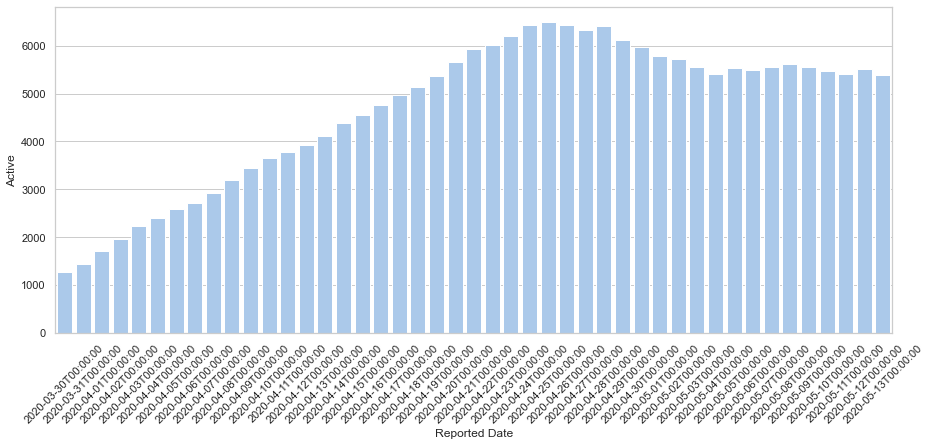

In [10]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize=(15, 6))

# total Active
sns.set_color_codes("pastel")
chart = sns.barplot(x="Reported Date", y="Active", data=df_Act_nn,
            label="Reported Date", color="b")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#
#sns.set_color_codes("muted")
#sns.barplot(x="Confirmed Positive", y="Reported Date", data=df2,
 #           label="Total", color="b")

In [11]:
df_Act_nn.tail()

,Reported Date,Confirmed Positive,Resolved,Total Cases,Active
93,2020-05-09T00:00:00,3962.0,14383.0,19944.0,5561.0
94,2020-05-10T00:00:00,3832.0,14772.0,20238.0,5466.0
95,2020-05-11T00:00:00,3746.0,15131.0,20546.0,5415.0
96,2020-05-12T00:00:00,3791.0,15391.0,20907.0,5516.0
97,2020-05-13T00:00:00,3626.0,15845.0,21236.0,5391.0
